Ads     Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Ads_Dataset.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Gender'>

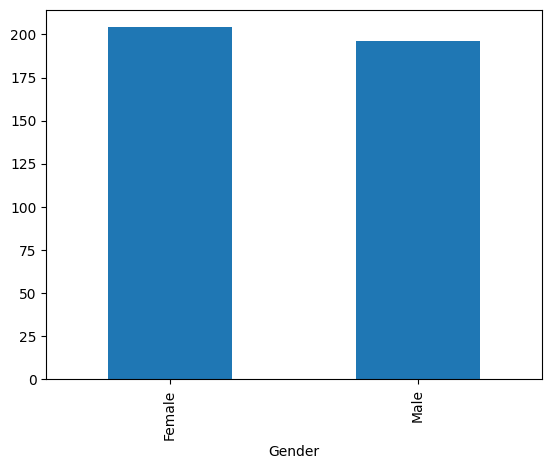

In [6]:
df['Gender'].value_counts().plot(kind = 'bar')

In [7]:

df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

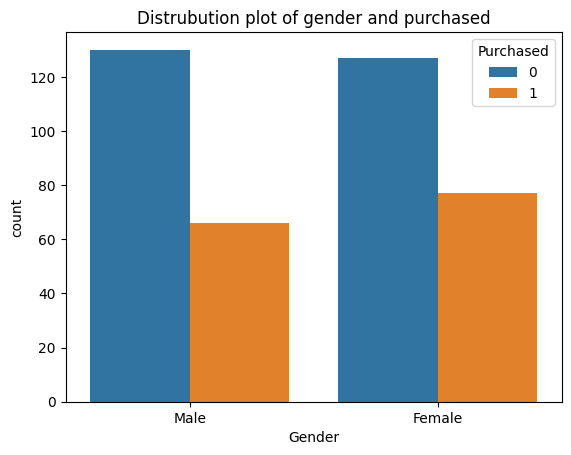

In [9]:

sns.countplot(data = df, x= 'Gender', hue = 'Purchased')
plt.title('Distrubution plot of gender and purchased')
plt.show()

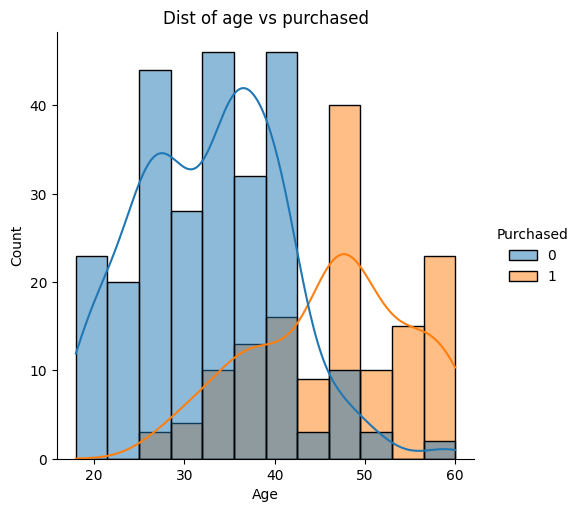

In [10]:
sns.displot(data = df, x= 'Age', hue = 'Purchased', bins =12,  kde = True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Dist of age vs purchased')
plt.show()

In [12]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [14]:
X = df.iloc[:, 1:4] # independent
y = df.iloc[:, 4] #dependent

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state =0)

In [17]:
train_test_split(X, y, test_size  = 0.2, random_state =0)

[     Gender  Age  EstimatedSalary
 336       0   58           144000
 64        1   59            83000
 55        1   24            55000
 106       1   26            35000
 300       1   58            38000
 ..      ...  ...              ...
 323       1   48            30000
 192       0   29            43000
 117       0   36            52000
 47        1   27            54000
 172       1   26           118000
 
 [320 rows x 3 columns],
      Gender  Age  EstimatedSalary
 132       0   30            87000
 309       1   38            50000
 341       0   35            75000
 196       1   30            79000
 246       1   35            50000
 ..      ...  ...              ...
 14        0   18            82000
 363       1   42            79000
 304       1   40            60000
 361       1   53            34000
 329       1   47           107000
 
 [80 rows x 3 columns],
 336    1
 64     0
 55     0
 106    0
 300    1
       ..
 323    1
 192    0
 117    0
 47     0
 172   

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)


In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)


In [24]:
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)

0.95